In [1]:
import pandas_datareader as web
from datetime import date
from dateutil.relativedelta import relativedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
def get_dates(data_window):
    '''
    Returns the start date and end date for given number of years

    Parameters:
    data_window (int): number of years of past data

    Returns:
    start_date (datetime): start date
    end_date (datetime): today's date
    '''
    end_date = pd.to_datetime(date.today())
    start_date = pd.to_datetime(
        date.today() + relativedelta(years=-data_window))

    return start_date, end_date

In [3]:
# take a look at stock
data_window = 1  # number of years of historical data to look at
start_date, end_date = get_dates(data_window)
stock = 'SPY'  # stock symbol

df = web.DataReader(stock, data_source='yahoo',
                    start=start_date, end=end_date)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-13,271.480011,248.520004,263.089996,269.320007,329566100.0,264.382690
2020-03-16,256.899994,237.360001,241.179993,239.850006,297240000.0,235.452972
2020-03-17,256.170013,237.070007,245.039993,252.800003,262070500.0,248.165558
2020-03-18,248.369995,228.020004,236.250000,240.000000,327597100.0,235.600204
2020-03-19,247.380005,232.220001,239.250000,240.509995,289322000.0,236.100845
...,...,...,...,...,...,...
2021-03-08,387.679993,381.420013,384.660004,381.720001,122957100.0,381.720001
2021-03-09,389.910004,385.309998,385.850006,387.170013,113457800.0,387.170013
2021-03-10,391.399994,388.170013,389.690002,389.579987,109660800.0,389.579987


In [4]:
# check for null values
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

Text(0.5, 1.0, 'SPY')

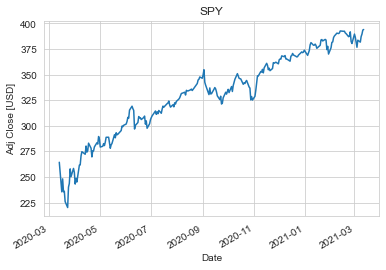

In [5]:
# plot adjusted close
sns.set_style('whitegrid')
df['Adj Close'].plot()
plt.xlabel('Date')
plt.ylabel('Adj Close [USD]')
plt.title(stock)

In [13]:
def plot_prediction(model, future_days, split_perc=0.8):
    '''
    Plots actual and predicted stock price using a given machine learning model. 
    Provides evaluation metrics as well.

    Parameters:
    model: machine learning model
    future_days (int): number of days lookahead for future value
    split_perc (float): percentage of training data

    Returns:
    None
    '''

    # future value is adjusted close future_days into the future
    df['Future'] = df['Adj Close'].shift(-future_days)

    # define features and labels
    X = df.drop('Future', axis=1).iloc[:-future_days]
    y = df['Future'].iloc[:-future_days]

    split_index = int(X.shape[0] * split_perc)

    # split data into train and test sets
    X_train = X.iloc[:split_index]
    y_train = y.iloc[:split_index]
    X_test = X.iloc[split_index:]
    y_test = y.iloc[split_index:]

    model.fit(X_train, y_train)  # train model
    y_pred = model.predict(X_test)  # make predictions on test dataset
    # store the adjusted close results in a dataframe
    results = pd.DataFrame(
        {'Actual': df['Adj Close'].iloc[split_index+future_days:], 'Predicted': y_pred})

    # evaluation metrics
    lr_results.loc[future_days, 'Mean Absolute Error'] = metrics.mean_absolute_error(
        results['Actual'], results['Predicted'])
    lr_results.loc[future_days, 'Root Mean Squared Error'] = np.sqrt(
        metrics.mean_squared_error(results['Actual'], results['Predicted']))

    # plot data
    plt.figure(figsize=(14, 6))
    plt.suptitle('{} day stock price prediction'.format(future_days))

    plt.subplot(1, 2, 1)  # subplot 1
    df['Adj Close'].plot(label='Actual')
    results['Predicted'].plot(label='Predicted')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Adj Close [USD]')
    plt.title(stock)

    plt.subplot(1, 2, 2)  # subplot 2 zoomed in
    df['Adj Close'].iloc[-y_test.shape[0]:].plot(label='Actual')
    results['Predicted'].plot(label='Predicted')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Adj Close [USD]')
    plt.title(stock + ' (closer look at test data)')

In [14]:
# makes stock price predictions for these days into the future
predictions = [7, 14, 28]
lr_results = pd.DataFrame(index=predictions, columns=[
                          'Mean Absolute Error', 'Root Mean Squared Error'])  # empty dataframe to store results

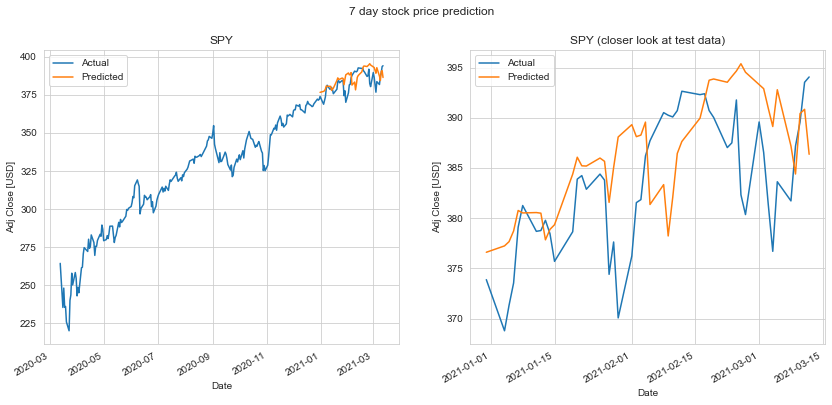

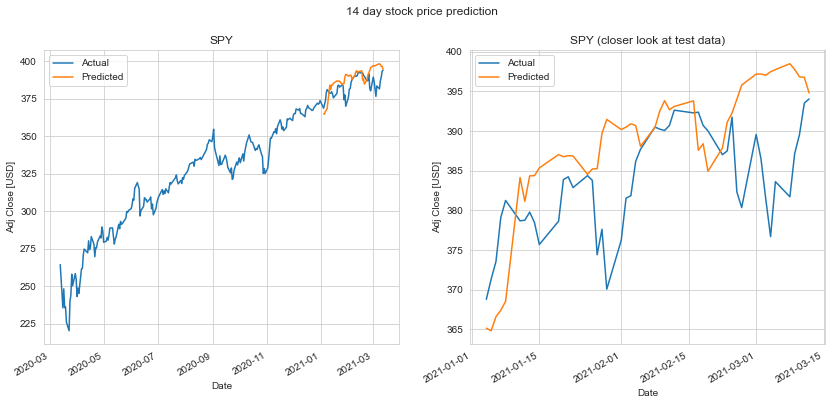

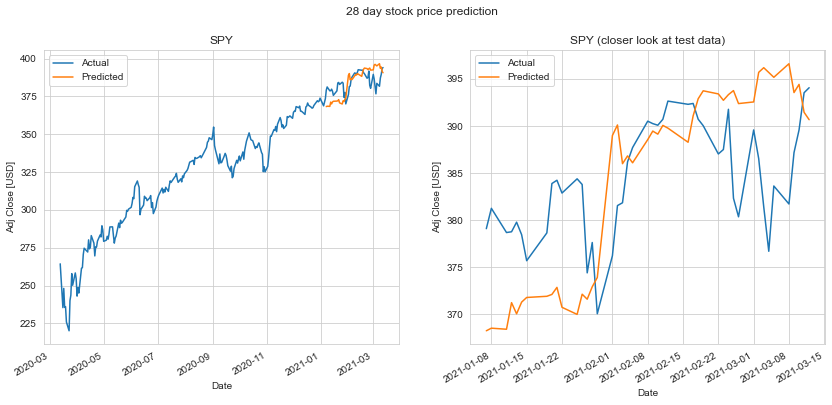

In [16]:
for future_days in predictions:
    plot_prediction(LinearRegression(), future_days)

In [17]:
lr_results

,Mean Absolute Error,Root Mean Squared Error
7,5.467419,6.772443
14,6.918179,8.857159
28,6.960422,8.441983
